# Estimation of the Average Customer Check

Created by **Tetiana Yatsiuk**  
✉️ *Email:*  tet.yatsiuk@gmail.com  
🔗 [*LinkedIn*](www.linkedin.com/in/tetianayatsiuk)   , 💻 [*GitHub*](https://github.com/YatsiukTetiana)

# 🗂️ Project Summary

**Objectives**
- Estimate the average customer check using multiple predictors.
- Improve model performance with regularization (Ridge, Lasso).
- Interpret feature importance and detect multicollinearity.

<br/>

**Dataset Description**  
Target variable (`y`): Average customer check in UAH  
Features (`X`):
- `x1`: Number of items in cart
- `x2`: Average item price (UAH)
- `x3`: Discount percentage (%)
- `x4`: Time spent on site before checkout (minutes)

<br/>

**Tools Used**
- Python (pandas, matplotlib, seaborn)
- Python sklearn:
   - `LinearRegression`
   - `train_test_split`
   - `metrics` (`mean_absolute_error`, `mean_squared_error`, `root_mean_squared_error`, `r2_score`)
   - `cross_val_score`
   - `StandardScaler`
   - `Ridge`, `Lasso`
- Markdown

# 1. 🔢 Initial Data

In [2]:
import pandas as pd

# x1: Number of items in the cart (Items_in_Cart)
num_items = [4, 8, 3, 7, 2, 6, 1, 5, 9, 2, 8, 4, 7, 3, 6, 2, 5, 9, 1, 4,
             7, 6, 3, 8, 2, 5, 4, 9, 7, 2, 6, 3, 8, 5, 1, 7, 9, 4, 6, 2]

# x2: Average price per item in the cart (in UAH) (Average_Item_Price)
avg_price = [150.8, 230.5, 175.2, 310.1, 200.0, 320.4, 120.5, 270.6, 450.2, 210.7,
             180.5, 350.1, 290.3, 410.5, 250.8, 280.7, 300.5, 490.1, 130.2, 260.5,
             340.8, 220.1, 170.5, 310.3, 180.6, 260.4, 300.9, 420.7, 290.5, 200.1,
             310.6, 150.5, 370.2, 280.5, 180.1, 400.7, 430.6, 270.5, 320.2, 150.6]

# x3: Discount percentage applied to the order (Discount_Percentage)
discount = [5.0, 10.5, 15.0, 8.5, 12.0, 20.0, 7.0, 14.0, 25.0, 6.5,
            9.0, 11.5, 22.0, 18.0, 10.0, 5.5, 16.0, 24.0, 13.0, 8.0,
            15.5, 17.0, 9.5, 19.0, 21.0, 7.5, 14.5, 25.0, 11.0, 10.0,
            20.5, 6.0, 13.5, 18.5, 8.5, 22.5, 24.5, 12.5, 14.0, 10.5]

# x4: Time spent on the website before placing the order (in minutes) (Time_on_Site)
time_spent = [25.0, 35.5, 28.0, 40.5, 22.0, 50.0, 18.5, 33.0, 48.5, 30.0,
              27.5, 38.0, 44.5, 39.0, 31.5, 29.0, 34.5, 49.0, 24.0, 32.0,
              37.5, 41.0, 26.0, 42.5, 23.5, 36.0, 30.5, 47.0, 29.5, 34.0,
              40.0, 28.5, 39.5, 43.0, 25.5, 45.5, 46.5, 30.0, 33.5, 27.0]

# y: Average order value (in UAH) (Average_Check)
avg_order = [950, 1780, 1120, 2250, 870, 2000, 650, 1600, 3200, 1050,
             1250, 2500, 2100, 2800, 1800, 1650, 1900, 3400, 750, 1550,
             2300, 1850, 1150, 2400, 890, 1700, 1950, 3100, 2200, 1450,
             2000, 950, 2500, 1750, 1250, 2850, 3300, 1550, 2100, 950]

data = pd.DataFrame({'avg_order': avg_order,
                     'num_items': num_items,
                     'avg_price': avg_price,
                     'discount': discount,
                     'time_spent': time_spent
                     })


8. Побудуй стандартизовану регресійну модель. Проаналізуй її коефіцієнти. Побудуй стовпчасту діаграму коефіцієнтів.

9. У підсумку, який із чотирьох розглянутих факторів найбільше впливає на середній чек покупця? Який впливає найменше?

Generating the X matrix of explanatory variables and the y vector of the target variable based on the data frame.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Matrix of explanatory variables and target variable
X = data[['num_items', 'avg_price', 'discount', 'time_spent']]
y = data['avg_order']

Splitting the dataset into training and test data. Test data contains 30% of the general data.

In [5]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# 2. 📈 Linear Regression Model

Training a linear regression model on the training data.

In [6]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Prediction using the trained model.

In [7]:
# Making prediction
y_pred = model.predict(X_test)

Model quality evaluation by MAE, MSE, and $R^2$

In [8]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

MAE: 152.5498638168349
MSE: 34036.63234071783
R^2: 0.9451785923616358


- The coefficient of determination $R^2$ = 0.94, which means that the model describes the dependence of the target variable on the explanatory variables quite well.
- The model makes an average mistake in predicting the average check by 153 UAH, which is uncritical.

Evaluating the quality of the model using cross-validation:

In [9]:
# Model evaluation by Cross-Validation
from sklearn.model_selection import cross_val_score

#model_cross = LinearRegression()
mae_scores = cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_absolute_error")
r2_scores = cross_val_score(model, X, y, cv = 5, scoring = "r2")

print("MAE\nCross-validation scores:", mae_scores)
print("Mean cross-validation score:", mae_scores.mean())
print("R^2\nCross-validation scores:", r2_scores)
print("Mean cross-validation score:", r2_scores.mean())

MAE
Cross-validation scores: [-129.2032032  -166.2782     -156.15597443 -119.08749059 -147.72852745]
Mean cross-validation score: -143.6906791344169
R^2
Cross-validation scores: [0.89205197 0.90838089 0.94877357 0.95434481 0.9529395 ]
Mean cross-validation score: 0.9312981450611307


According to the results, the coefficient of determination $R^2$ = 0.93, which points that the model accuracy is good enough.

Mean absolute error (MAE) for Cross-Validation is less than for simple MAE (143 UAH vs 152 UAH).

# 3. 🔎 Model Coefficients Analysis

In [10]:
# Coefficients of a linear regression model

print(f"Model Coefficients:\n w_0: {model.intercept_}\n coefficients:{model.coef_}")

Model Coefficients:
 w_0: -369.10470516084
 coefficients:[56.57003525  7.18068693 -4.55923728 -0.08130926]


Coefficients for explanatory variables:



`Average Check` = -369.10 + 56.57 * `items in cart` + 7.18 * `average item price` - 4.55 * `discount percentage` - 0.08 * `time on site`

Positive coefficients for:
- number of items in cart (56.57)
- average item price (7.18)

Negative coefficients for:
- discount percentage (-4.55)
- time on site (-0.08)

On a scale relative to each other, the coefficient of the number of items in the cart has the greatest positive impact (56.57). The coefficient of discount percentage has the greatest negative impact (-4.55)

**Interpretation of model coefficients**
- if the number of ordered units of goods increases by one unit, the average check **increases** by an average of 56.57 UAH;
- if the average price of ordered goods increases by UAH 1, the average check **increases** by about 7.18 UAH;
- if the discount on goods in the check increases by 1%, the average check **decreases** by 4.55 UAH;
- if the time spent on the website increases by 1 minute, the average check **decreases** by 0.08 UAH.

# 4. 📏 Model Standartization

To avoid the influence of scale, we use data normalization (scaling).  
 Normalized data allows to compare coefficients for different variables without distortions caused by scale. Standardization involves subtracting the mean value of a variable and dividing it by its standard deviation.

In [18]:
from sklearn.preprocessing import StandardScaler

# standartization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# split data into train and test
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

# model training
model_scaled = LinearRegression()
model_scaled.fit(X_scaled_train, y_scaled_train)

# making prediction
y_scaled_pred = model_scaled.predict(X_scaled_test)

# get coefficients
print(f"Normalized Model Coefficients: {model_scaled.coef_}")

Normalized Model Coefficients: [ 1.40858252e+02  6.67456950e+02 -2.67716315e+01 -6.65817343e-01]


**For Normalized Data**  
`Average Check` = -369.10 + 140.86 * `items in cart` + 667.45 * `average item price` - 26.77 * `discount percentage` - 0.67 * `time on site`

Bulding the bar chart for model coefficients:

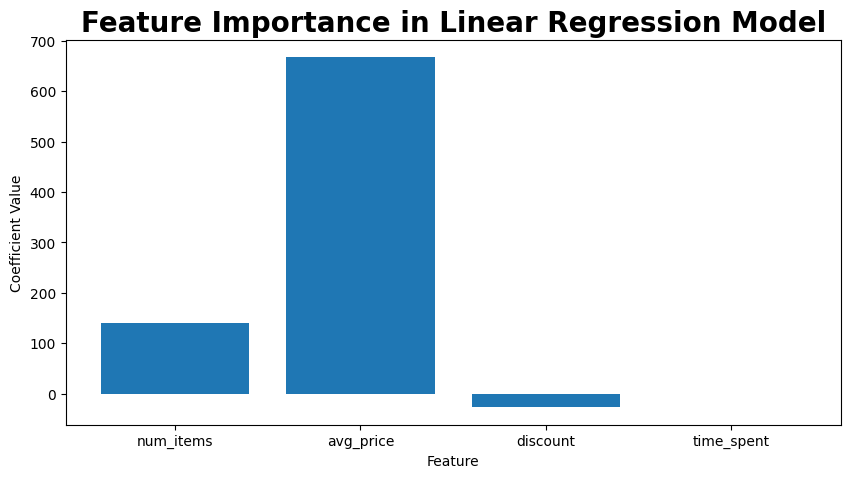

In [20]:
import matplotlib.pyplot as plt

feature_importance = model_scaled.coef_

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=["num_items", "avg_price", "discount", "time_spent"])
plt.title("Feature Importance in Linear Regression Model", weight = "bold", fontsize = 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.show()

For standardized linear regression, the coefficients obtained after training the model can be directly used to determine the importance of the factors.   
The higher the coefficient value (in absolute terms, i.e., by module), the more significant the impact of the corresponding factor on the target variable.

The impact of the factors:
1. Average item price (667.46)
2. Number of items in cart (140.86)
3. Discount percentage (-26.77)
4. Time on site (-0.67).

The sign of the coefficient indicates the nature of the impact (direct or inverse).

So, the average price of goods in the order has the greatest impact on the average check. The average check is least affected by the amount of discount and time spent on the website.

# 5. 🕸️ Checking Explanatory Variables for Multicollinearity

In [21]:
# Correlation matrix of explanatory variables
X.corr()

,num_items,avg_price,discount,time_spent
num_items,1.000000,0.711856,0.566820,0.763866
avg_price,0.711856,1.000000,0.690811,0.835995
discount,0.566820,0.690811,1.000000,0.729461
time_spent,0.763866,0.835995,0.729461,1.000000


Since the correlation coefficients are quite big (0.56 - 0.84), there are signs of multicollinearity.

# 6. 🧮 Regularized Linear Regression Model

## Model regularization with a **default hyperparameter**
(Ridge and Lasso regression)

In [22]:
from sklearn.linear_model import Ridge, Lasso

In [23]:
# train Ridge model
ridge = Ridge()
ridge.fit(X_train, y_train)

# evaluate Ridge model
y_pred_ridge = ridge.predict(X_test)

In [24]:
# train Lasso model
lasso = Lasso()
lasso.fit(X_train, y_train)

# evaluate Ridge model
y_pred_lasso = lasso.predict(X_test)

In [25]:
print('MAE (Linear model without regularization):', mae)
print("MSE (Linear model without regularization):", mse)
print("R^2 (Linear model without regularization):", r2)

print('\nMAE (Ridge model):', mean_absolute_error(y_test, y_pred_ridge))
print("MSE (Ridge model):", mean_squared_error(y_test, y_pred_ridge))
print("R^2 (Ridge model):", r2_score(y_test, y_pred_ridge))

print('\nMAE (Lasso model):', mean_absolute_error(y_test, y_pred_lasso))
print("MSE (Lasso model):", mean_squared_error(y_test, y_pred_lasso))
print("R^2 (Lasso model):", r2_score(y_test, y_pred_lasso))

MAE (Linear model without regularization): 152.5498638168349
MSE (Linear model without regularization): 34036.63234071783
R^2 (Linear model without regularization): 0.9451785923616358

MAE (Ridge model): 152.207354099299
MSE (Ridge model): 33854.76779899772
R^2 (Ridge model): 0.9454715141194877

MAE (Lasso model): 152.2620711098971
MSE (Lasso model): 33884.03998222073
R^2 (Lasso model): 0.9454243666146209


Model Regularization has lead to the model improvement.
- MSE is the least for the Ringe model
- $R^2$ is the biggest for the Ringe model

The **Ridge model** seems to be the most accurate.

## Selection of the optimal hyperparameter for the Ridge model

In [26]:
possible_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

r2_scores = []
for alpha in possible_alpha:
  ridges = Ridge(alpha = alpha)
  ridges.fit(X_train, y_train)
  y_pred_ridges = ridges.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred_ridges))

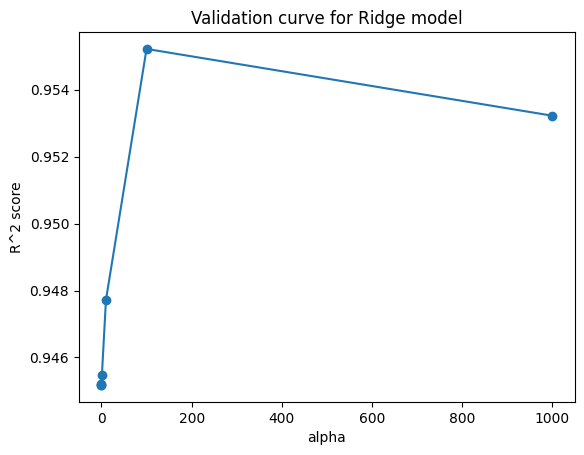

In [27]:
# plot validation curve
plt.plot(possible_alpha, r2_scores, marker="o")
plt.xlabel("alpha")
plt.ylabel("R^2 score")
plt.title("Validation curve for Ridge model")
plt.show()

In [28]:
print("r2 scores:", r2_scores)
print("possible alpha:", possible_alpha)

r2 scores: [0.9451788902567507, 0.9451815708580421, 0.9452083319188762, 0.9454715141194877, 0.9477188019423811, 0.9552178346168949, 0.9532222836566401]
possible alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]


The most optimal value of the hyperparameter for the Ridge model is `alpha = 100` ($R^2$ is the largest then).

Building Ridge model with `alpha = 100`:

In [29]:
# train optimal Ridge model
ridge_optimal = Ridge(alpha = 100)
ridge_optimal.fit(X_train, y_train)

# evaluate optimal Ridge model
y_pred_ridge_optimal = ridge_optimal.predict(X_test)

print("MAE (Ridge model):", mean_absolute_error(y_test, y_pred_ridge_optimal))
print("MSE (Ridge model):", mean_squared_error(y_test, y_pred_ridge_optimal))
print("R2 (Ridge model):", r2_score(y_test, y_pred_ridge_optimal))

# cross-validation evaluation
scores_ridge_optimal = cross_val_score(ridge_optimal, X, y, cv=5, scoring='neg_mean_absolute_error')

print("\nCross-validation scores:", scores_ridge_optimal)
print("Mean MAE cross-validation score:", scores_ridge_optimal.mean())

scores_ridge_optimal = cross_val_score(ridge_optimal, X, y, cv=5, scoring='r2')

print("\nCross-validation scores:", scores_ridge_optimal)
print("Mean R2 cross-validation score:", scores_ridge_optimal.mean())

MAE (Ridge model): 140.6013603366395
MSE (Ridge model): 27803.629352620006
R2 (Ridge model): 0.9552178346168949

Cross-validation scores: [-148.5478855  -104.43943201 -155.71634796 -123.24133578 -136.16223785]
Mean MAE cross-validation score: -133.62144782145592

Cross-validation scores: [0.87647507 0.96296053 0.94547626 0.94834527 0.95564847]
Mean R2 cross-validation score: 0.937781118691951


The result has improved compared to the previous one and is also better than the model without regularization.

## Selection of the optimal hyperparameter for the Lasso model

In [30]:
r2_scores_lasso = []
for alpha in possible_alpha:
  lassos = Lasso(alpha = alpha)
  lassos.fit(X_train, y_train)
  y_pred_lassos = lassos.predict(X_test)
  r2_scores_lasso.append(r2_score(y_test, y_pred_lassos))

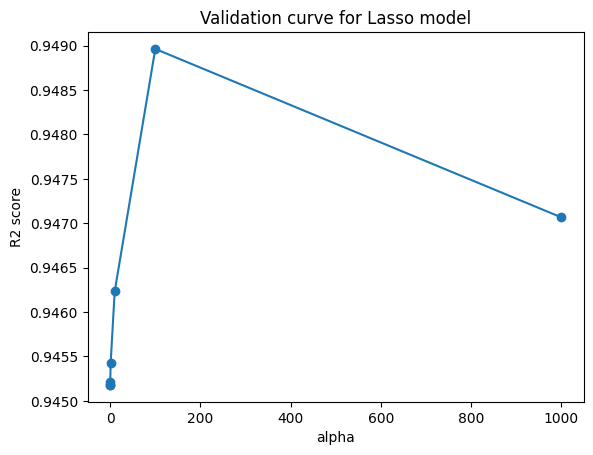

In [31]:
# plot validation curve
plt.plot(possible_alpha, r2_scores_lasso, marker="o")
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Validation curve for Lasso model")
plt.show()

In [32]:
print("r2 scores:", r2_scores_lasso)
print("possible alpha:", possible_alpha)

r2 scores: [0.9451788969356408, 0.9451816370638395, 0.9452089839685629, 0.9454243666146209, 0.9462329310345855, 0.9489635566659039, 0.9470674011696112]
possible alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]


The most optimal value of the hyperparameter for the Lasso model is `alpha = 100` (R^2 is the largest then).

Building Lasso model with `alpha = 100`:

In [ ]:
# train optimal Lasso model
lasso_optimal = Lasso(alpha = 100)
lasso_optimal.fit(X_train, y_train)

# evaluate optimal Lasso model
y_pred_lasso_optimal = lasso_optimal.predict(X_test)

print("MAE (Lasso model):", mean_absolute_error(y_test, y_pred_lasso_optimal))
print("MSE (Lasso model):", mean_squared_error(y_test, y_pred_lasso_optimal))
print("R2 (Lasso model):", r2_score(y_test, y_pred_lasso_optimal))

# cross-validation evaluation
scores_lasso_optimal = cross_val_score(lasso_optimal, X, y, cv=5, scoring='neg_mean_absolute_error')

print("\nCross-validation scores:", scores_lasso_optimal)
print("Mean MAE cross-validation score:", scores_lasso_optimal.mean())

scores_lasso_optimal = cross_val_score(lasso_optimal, X, y, cv=5, scoring='r2')

print("\nCross-validation scores:", scores_lasso_optimal)
print("Mean R2 cross-validation score:", scores_lasso_optimal.mean())

MAE (Lasso model): 150.65477515954578
MSE (Lasso model): 31686.684683464282
R2 (Lasso model): 0.9489635566659039

Cross-validation scores: [-156.67320458 -108.81129446 -157.17373446 -119.41047472 -132.2637588 ]
Mean MAE cross-validation score: -134.8664934036819

Cross-validation scores: [0.86844523 0.96192776 0.94070546 0.95090849 0.95745441]
Mean R2 cross-validation score: 0.9358882706536924


The result has improved compared to the previous Lasso model and is also better than the model without regularization, but worse than the optimal Ridge model.

In [ ]:
# Lasso coefficients
print("Lasso coefficients:", lasso_optimal.coef_)

Lasso coefficients: [29.11511062  7.42907107 -0.          0.        ]


In this model, the last two coefficients are close to zero (`discount` and `time_spent`), while all other explanatory variables are considered important by the model.

# 7. 📌 Conclusions

1) For standardized linear regression, the coefficients obtained after training the model can be directly used to determine the importance of the factors.   

  The impact of the factors:
1. Average item price (667.46)
2. Number of items in cart (140.86)
3. Discount percentage (-26.77)
4. Time on site (-0.67).

The sign of the coefficient indicates the nature of the impact (direct or inverse).

So, the average price of goods in the order has the greatest impact on the average check. The average check is least affected by the amount of discount and time spent on the website.

2) Based on the correlation matrix analysis, there are signs of multicollinearity.

3) The most accurate regularization model is the **Ridge model** with a hyperparameter `alpha` = 100.  
For the most accurate Lasso model, *discount percentage* and *time on site* coefficients are close to zero, while *number of items in cart* and *average item price* are considered important by the model.